In [ ]:
import os
p = "/content/Images.zip"
print("Exists:", os.path.exists(p))
if os.path.exists(p):
    print("Path:", p)
    print("Size (MB):", os.path.getsize(p) / (1024*1024))
    print("Listing /content:")
    print("\n".join(os.listdir("/content")[:50]))
else:
    print("No Images.zip found at /content. Please upload it (left Files pane → Upload).")


Exists: True
Path: /content/Images.zip
Size (MB): 30.0
Listing /content:
.config
temp_images
Images.zip
labels.csv
.ipynb_checkpoints
object_detection_project
sample_data


In [ ]:
import zipfile, binascii
p = "/content/Images.zip"
print("zipfile.is_zipfile:", zipfile.is_zipfile(p))

# Print the first 8 bytes (header) as hex (safe to print)
with open(p, "rb") as f:
    head = f.read(8)
print("Header bytes (hex):", binascii.hexlify(head).decode())
print("Header (ascii, non-printable shown raw):", head)


zipfile.is_zipfile: False
Header bytes (hex): 504b030414000000
Header (ascii, non-printable shown raw): b'PK\x03\x04\x14\x00\x00\x00'


In [ ]:
!unzip -t /content/Images.zip


Archive:  /content/Images.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/Images.zip or
        /content/Images.zip.zip, and cannot find /content/Images.zip.ZIP, period.


In [ ]:
import zipfile, os, glob, shutil
TEMP_DIR = "/content/temp_images"
if os.path.exists(TEMP_DIR):
    shutil.rmtree(TEMP_DIR)
os.makedirs(TEMP_DIR, exist_ok=True)

with zipfile.ZipFile("/content/Images.zip", 'r') as z:
    z.extractall(TEMP_DIR)

# count images found
images = []
for root, dirs, files in os.walk(TEMP_DIR):
    for f in files:
        if f.lower().endswith(('.jpg','.jpeg','.png')):
            images.append(os.path.join(root,f))
print("Extracted total images:", len(images))
print("Example paths:", images[:5])


Extracted total images: 5626
Example paths: ['/content/temp_images/Images/00004878.jpg', '/content/temp_images/Images/00004231.jpg', '/content/temp_images/Images/00000492.jpg', '/content/temp_images/Images/00001635.jpg', '/content/temp_images/Images/00005262.jpg']


In [ ]:
import os, shutil, glob

# Source where images currently are
src_dir = "/content/temp_images/Images"
# Destination where YOLO expects them
dst_dir = "/content/object_detection_project/data/images"

os.makedirs(dst_dir, exist_ok=True)

# Move all jpg/jpeg/png files
for img in glob.glob(f"{src_dir}/*.*"):
    shutil.move(img, dst_dir)

print("✅ Moved all images to:", dst_dir)
print("Total images now:", len(os.listdir(dst_dir)))

# Cleanup temporary folders
shutil.rmtree("/content/temp_images", ignore_errors=True)


✅ Moved all images to: /content/object_detection_project/data/images
Total images now: 5626


In [ ]:
import os
path = "/content/object_detection_project/data/images"
files = os.listdir(path)
print("✅ Verified images in:", path)
print("Total files:", len(files))
print("Sample files:", files[:5])


✅ Verified images in: /content/object_detection_project/data/images
Total files: 5626
Sample files: ['00004878.jpg', '00004231.jpg', '00000492.jpg', '00001635.jpg', '00005262.jpg']


In [ ]:
import shutil, os

src_csv = "/content/labels.csv"
dst_csv = "/content/object_detection_project/data/labels.csv"

os.makedirs(os.path.dirname(dst_csv), exist_ok=True)
shutil.copy(src_csv, dst_csv)

print("✅ labels.csv copied successfully to:", dst_csv)


✅ labels.csv copied successfully to: /content/object_detection_project/data/labels.csv


In [ ]:
import os, random, shutil

DATA_DIR = "/content/object_detection_project/data"

# Create YOLO subfolders
for folder in ["train/images", "train/labels", "val/images", "val/labels"]:
    os.makedirs(os.path.join(DATA_DIR, folder), exist_ok=True)

# Split images
image_files = os.listdir(f"{DATA_DIR}/images")
random.shuffle(image_files)
split_index = int(0.8 * len(image_files))
train_imgs = image_files[:split_index]
val_imgs = image_files[split_index:]

# Move images
for f in train_imgs:
    shutil.copy(os.path.join(DATA_DIR, "images", f),
                os.path.join(DATA_DIR, "train/images", f))
for f in val_imgs:
    shutil.copy(os.path.join(DATA_DIR, "images", f),
                os.path.join(DATA_DIR, "val/images", f))

print(f"✅ Split complete: {len(train_imgs)} train, {len(val_imgs)} val images")


✅ Split complete: 4500 train, 1126 val images


In [ ]:
import os

for root, dirs, files in os.walk("/content/object_detection_project/data"):
    level = root.replace("/content/object_detection_project/data", "").count(os.sep)
    indent = " " * (2 * level)
    print(f"{indent}{os.path.basename(root)}/ ({len(files)} files)")


data/ (1 files)
  val/ (0 files)
    labels/ (0 files)
    images/ (1126 files)
  train/ (0 files)
    labels/ (0 files)
    images/ (4500 files)
  images/ (5626 files)


In [ ]:
import pandas as pd

csv_path = "/content/object_detection_project/data/labels.csv"
labels_df = pd.read_csv(csv_path)

print("✅ CSV loaded successfully!")
print("\n📊 Shape of data:", labels_df.shape)
print("\n📋 Column names:")
print(labels_df.columns.tolist())

print("\n🔍 First 5 rows:")
print(labels_df.head())


✅ CSV loaded successfully!

📊 Shape of data: (351548, 6)

📋 Column names:
['00000000', 'pickup_truck', '213', '34', '255', '50']

🔍 First 5 rows:
   00000000       pickup_truck  213   34  255   50
0         0                car  194   78  273  122
1         0                car  155   27  183   35
2         0  articulated_truck   43   25  109   55
3         0                car  106   32  124   45
4         1                bus  205  155  568  314


In [ ]:
import pandas as pd

csv_path = "/content/object_detection_project/data/labels.csv"
labels_df = pd.read_csv(csv_path, header=None)

# Rename columns properly
labels_df.columns = ['image_id', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

print("✅ Renamed columns successfully!")
print(labels_df.head())
print("\nUnique classes:", labels_df['class'].unique())
print("Total rows:", len(labels_df))


✅ Renamed columns successfully!
   image_id              class  xmin  ymin  xmax  ymax
0         0       pickup_truck   213    34   255    50
1         0                car   194    78   273   122
2         0                car   155    27   183    35
3         0  articulated_truck    43    25   109    55
4         0                car   106    32   124    45

Unique classes: ['pickup_truck' 'car' 'articulated_truck' 'bus' 'motorized_vehicle' 'work_van' 'single_unit_truck' 'pedestrian' 'bicycle' 'non-motorized_vehicle' 'motorcycle']
Total rows: 351549


In [ ]:
# Create mapping from class names to IDs
class_names = ['pickup_truck', 'car', 'articulated_truck', 'bus',
               'motorized_vehicle', 'work_van', 'single_unit_truck',
               'pedestrian', 'bicycle', 'non-motorized_vehicle', 'motorcycle']

class_to_id = {name: idx for idx, name in enumerate(class_names)}

print("✅ Class to ID mapping:")
for k, v in class_to_id.items():
    print(f"{v} → {k}")


✅ Class to ID mapping:
0 → pickup_truck
1 → car
2 → articulated_truck
3 → bus
4 → motorized_vehicle
5 → work_van
6 → single_unit_truck
7 → pedestrian
8 → bicycle
9 → non-motorized_vehicle
10 → motorcycle


In [ ]:
import os
from tqdm import tqdm

DATA_DIR = "/content/object_detection_project/data"
labels_path = os.path.join(DATA_DIR, "labels.csv")
labels_df = pd.read_csv(labels_path, header=None)
labels_df.columns = ['image_id', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

# Create directories
os.makedirs(f"{DATA_DIR}/train/labels", exist_ok=True)
os.makedirs(f"{DATA_DIR}/val/labels", exist_ok=True)

# Set assumed image size (change if known)
IMG_WIDTH = 640
IMG_HEIGHT = 480

# Convert and save
for _, row in tqdm(labels_df.iterrows(), total=len(labels_df)):
    image_name = f"{int(row.image_id):08d}.jpg"  # example: 00000001.jpg
    cls = class_to_id.get(row['class'], -1)
    if cls == -1:
        continue  # skip unknown classes

    # Normalize coordinates
    x_center = ((row['xmin'] + row['xmax']) / 2) / IMG_WIDTH
    y_center = ((row['ymin'] + row['ymax']) / 2) / IMG_HEIGHT
    width = (row['xmax'] - row['xmin']) / IMG_WIDTH
    height = (row['ymax'] - row['ymin']) / IMG_HEIGHT

    # Decide whether this image is in train or val split
    target_dir = "train" if os.path.exists(f"{DATA_DIR}/train/images/{image_name}") else "val"
    label_file = f"{DATA_DIR}/{target_dir}/labels/{image_name.replace('.jpg', '.txt')}"

    # Append annotation
    with open(label_file, "a") as f:
        f.write(f"{cls} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

print("✅ All YOLO label files created successfully!")


100%|██████████| 351549/351549 [00:50<00:00, 6921.42it/s]

✅ All YOLO label files created successfully!


In [ ]:
import random

sample_labels = random.sample(os.listdir(f"{DATA_DIR}/train/labels"), 3)
for lbl in sample_labels:
    print(f"\n📄 {lbl}")
    with open(f"{DATA_DIR}/train/labels/{lbl}") as f:
        print(f.read().strip()[:200])



📄 00004876.txt
1 0.098437 0.501042 0.078125 0.139583
1 0.721094 0.395833 0.239063 0.145833

📄 00004098.txt
1 0.071094 0.367708 0.039062 0.047917

📄 00001705.txt
1 0.125781 0.151042 0.051562 0.060417
3 0.890625 0.250000 0.465625 0.366667


In [ ]:
import yaml, os

DATA_DIR = "/content/object_detection_project/data"

yaml_content = {
    'path': DATA_DIR,
    'train': 'train/images',
    'val': 'val/images',
    'nc': len(class_names),
    'names': class_names
}

yaml_path = f"{DATA_DIR}/dataset.yaml"
with open(yaml_path, 'w') as f:
    yaml.dump(yaml_content)

print("✅ dataset.yaml file created at:", yaml_path)
!cat {yaml_path}


✅ dataset.yaml file created at: /content/object_detection_project/data/dataset.yaml


In [ ]:
DATA_DIR = "/content/object_detection_project/data"

yaml_text = """path: /content/object_detection_project/data
train: train/images
val: val/images

nc: 11
names:
  - pickup_truck
  - car
  - articulated_truck
  - bus
  - motorized_vehicle
  - work_van
  - single_unit_truck
  - pedestrian
  - bicycle
  - non-motorized_vehicle
  - motorcycle
"""

yaml_path = f"{DATA_DIR}/dataset.yaml"
with open(yaml_path, "w") as f:
    f.write(yaml_text)

print("✅ Fixed dataset.yaml created successfully!")
!cat {yaml_path}


✅ Fixed dataset.yaml created successfully!
path: /content/object_detection_project/data
train: train/images
val: val/images

nc: 11
names:
  - pickup_truck
  - car
  - articulated_truck
  - bus
  - motorized_vehicle
  - work_van
  - single_unit_truck
  - pedestrian
  - bicycle
  - non-motorized_vehicle
  - motorcycle


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

print("🚀 Starting YOLO training...")

results = model.train(
    data="/content/object_detection_project/data/dataset.yaml",
    epochs=10,
    imgsz=640,
    batch=16,
    name="vehicle_detection_model",
    project="/content/object_detection_project"
)

print("✅ Training complete!")


🚀 Starting YOLO training...
Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/object_detection_project/data/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=vehicle_detection_model2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto

🚀 Running detection on random validation images...

🔍 Detecting in: 00005486.jpg

image 1/1 /content/object_detection_project/data/val/images/00005486.jpg: 448x640 2 cars, 18.0ms
Speed: 14.0ms preprocess, 18.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/object_detection_project/inference_results/predict6
✅ Prediction complete!

🔍 Detecting in: 00003209.jpg

image 1/1 /content/object_detection_project/data/val/images/00003209.jpg: 448x640 1 car, 10.8ms
Speed: 2.8ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/object_detection_project/inference_results/predict7
✅ Prediction complete!

📁 Latest prediction folder: /content/object_detection_project/inference_results/predict7
🖼️ Found 1 predicted images to display

📸 Showing: 00003209.jpg


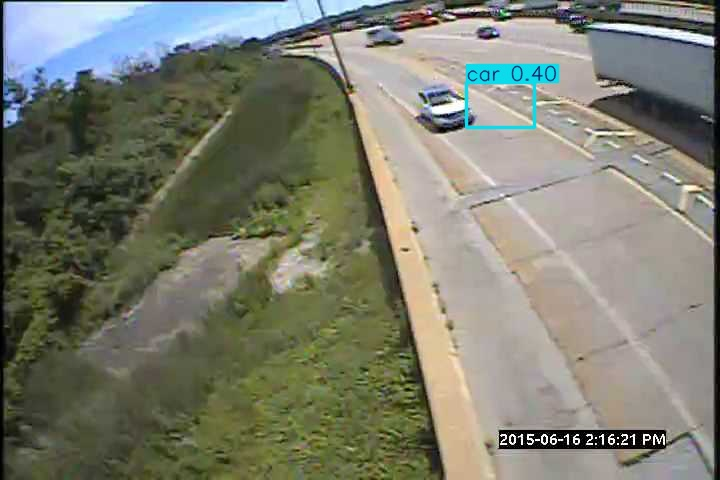

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import os, glob, random

# Model path
model_path = "/content/object_detection_project/vehicle_detection_model2/weights/best.pt"
model = YOLO(model_path)

# Validation images
VAL_DIR = "/content/object_detection_project/data/val/images"
sample_imgs = random.sample(os.listdir(VAL_DIR), 2)  # choose 2 random test images

output_dir = "/content/object_detection_project/inference_results"
os.makedirs(output_dir, exist_ok=True)

print("🚀 Running detection on random validation images...\n")

for img_name in sample_imgs:
    img_path = os.path.join(VAL_DIR, img_name)
    print(f"🔍 Detecting in: {img_name}")
    results = model.predict(source=img_path, conf=0.4, save=True, project=output_dir)
    print("✅ Prediction complete!\n")

# 🧠 Find the latest prediction folder (predict, predict2, predict3, etc.)
predict_folders = sorted(glob.glob(os.path.join(output_dir, "predict*")), key=os.path.getmtime)
latest_pred_dir = predict_folders[-1]
print("📁 Latest prediction folder:", latest_pred_dir)

# 🎯 Display all detected images found in that folder
predicted_images = glob.glob(os.path.join(latest_pred_dir, "*.jpg"))
print(f"🖼️ Found {len(predicted_images)} predicted images to display\n")

for pred_img in predicted_images:
    print(f"📸 Showing:", os.path.basename(pred_img))
    display(Image(filename=pred_img))
